In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# logs:
        # client – идентификатор пользователя
        # success – результат (успех - 1, нет - 0)
        # platform – платформа
        # time – время в формате Unix

logs = pd.read_csv('3_logs.csv')

# user_data:
        # client – идентификатор пользователя
        # premium – является ли клиент премиум
        # age – возраст
        
user_data = pd.read_csv('3_user_data.csv')

In [4]:
# Вопрос: Сколько уникальных значений принимает переменная platform?
# Ответ: 3

logs.platform.nunique()

3

In [5]:
# Какой клиент совершил больше всего успешных операций?
# Ответ в списке с ID

success_clients = logs.query('success == True').groupby('client').agg({'success' : 'count'}).sort_values('success', ascending=False).reset_index().head(9)
f'Больше всего успешных операций совершили клиенты с ID  : {sorted(success_clients.client.tolist()[:9])}'

'Больше всего успешных операций совершили клиенты с ID  : [12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]'

In [6]:
# С какой платформы было совершено наибольшее количество успешных операций?
# Ответ в датафрейме: phone

success_platform = logs.query('success == True').groupby('platform').agg({'success' : 'count'}).sort_values('success', ascending=False).reset_index()
success_platform

,platform,success
0,phone,2019
1,computer,1090
2,tablet,180


In [11]:
# Какая платформа наиболее популярна среди премиумных клиентов?
# Ответ = phone

df_combined = logs.merge(user_data, on = 'client')
top_premium_platform = df_combined.query('premium == True').groupby('platform').agg({'premium' : 'count'}).sort_values('premium', ascending=False).reset_index()
top_premium_platform

,platform,premium
0,phone,246
1,computer,150
2,tablet,24


C:\Users\tvoya\AppData\Local\Temp\ipykernel_7196\4104563166.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == False').age)
C:\Users\tvoya\AppData\Local\Temp\ipykernel_7196\4104563166.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == True').age)


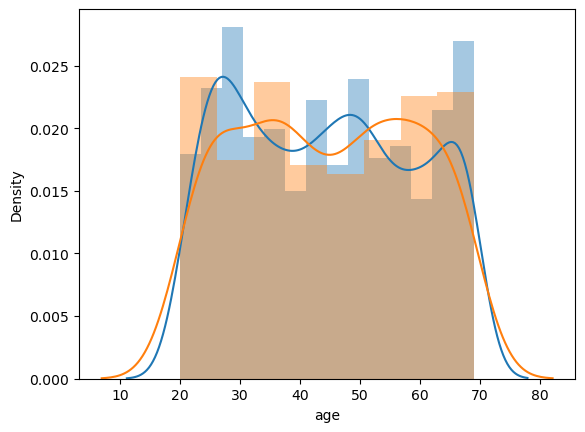

In [19]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)

data = user_data.merge(logs)
data.query('premium == True').platform.value_counts()

# Distribution plot - принимает как минимум 1 колонку из df,

# В jupyter - чтобы n функций были в 1 графике - достаточно поместисть их в 1 ячейку

sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

# This function has been deprecated and will be removed in seaborn v0.14.0. 
# It has been replaced by histplot() and displot(), two functions with a modern API and many more capabilities.

C:\Users\tvoya\AppData\Local\Temp\ipykernel_7196\965098489.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == False').age, ax=ax[0], color = 'red')
C:\Users\tvoya\AppData\Local\Temp\ipykernel_7196\965098489.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('

(0.0, 80.0)

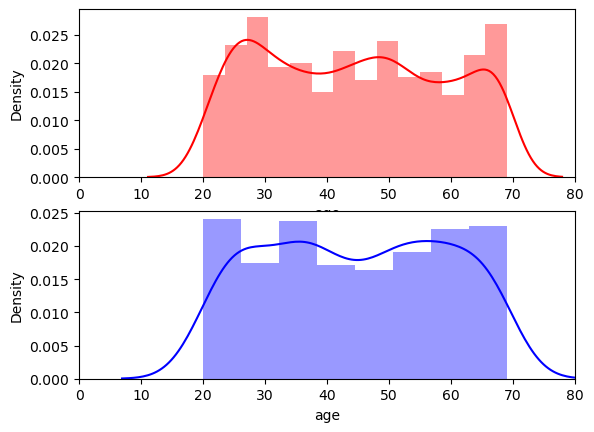

In [27]:
# Альтернативное решение на двух графиках
# Используется matplotlib.pyplot

# Метод plt.subplots : используется для создания фигуры и системы подграфиков (subplots). 
# Она возвращает объект фигуры (fig) и массив (или двумерный массив) подграфиков (ax).
# nrows и ncols: определяют количество строк (nrows) и столбцов (ncols) в системе подграфиков.
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sns.distplot(data.query('premium == False').age, ax=ax[0], color = 'red')
ax[0].set_xlim(0, 80) # Здесь ограничение по оси X соответственно от 0 до 80
sns.distplot(data.query('premium == True').age, ax=ax[1], color = 'blue')
ax[1].set_xlim(0, 80)


<Axes: xlabel='count', ylabel='count'>

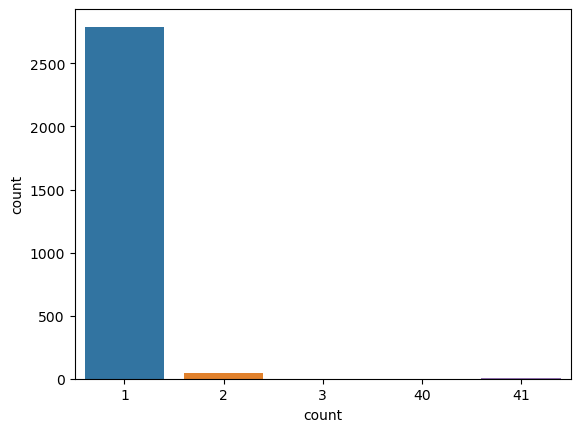

In [37]:
# Постройте график распределения числа успешных операций: 
# x – число успешных операций
# y – число клиентов, совершивших такое количество успешных операций

succ_count = logs.loc[logs.success].client.value_counts()
sns.countplot(x=succ_count)

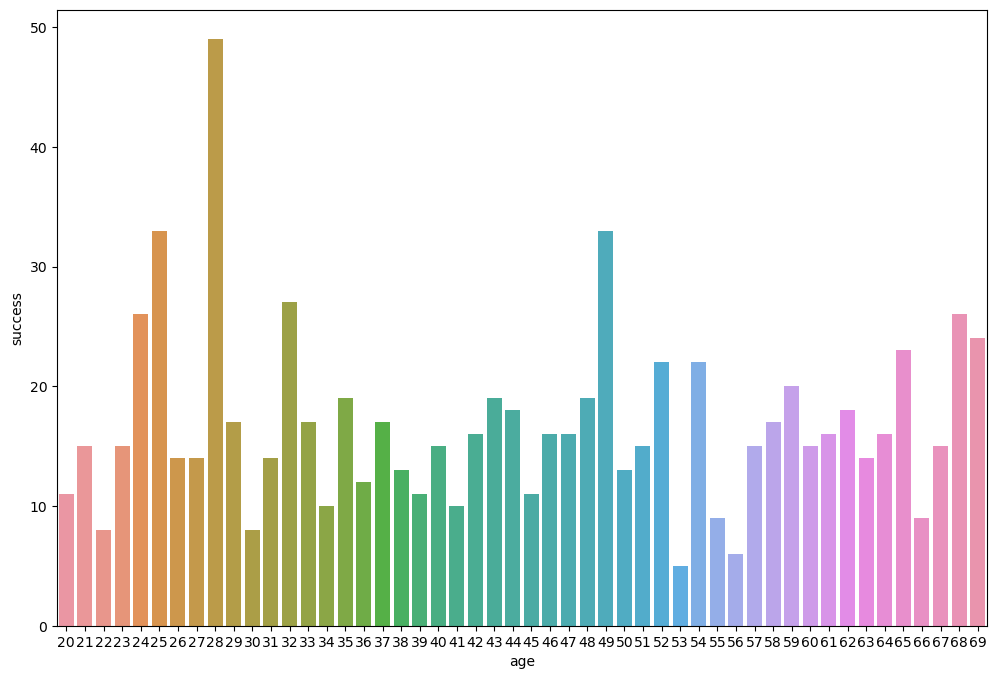

In [38]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
# По оси x – возраст, по оси y – число успешных операций. 
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

comp_success_by_age = df_combined.query('platform == "computer"').groupby('age', as_index=False).agg({'success' : 'sum'})

plt.figure(figsize=(12, 8))
sns.barplot(x=comp_success_by_age.age, y=comp_success_by_age.success)
plt.show()

In [ ]:
# 2-e решение

comp_succ = df_combined.query('platform == "computer" and success == True')
sns.countplot(comp_succ.age)